In [90]:
#Importing SKLearn only to use PCA - to plot multidimensional data
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import random

In [91]:
df = pd.read_csv("../archive/players_22.csv")
features = ["overall", "potential", "wage_eur", "value_eur", "age"]
df = df.dropna(subset=features)
data = df[features].copy()

#MinMax Scaling of Data
data = ((data - data.min()) / (data.max() - data.min())) * 10 + 1

C:\Users\prasa\AppData\Local\Temp\ipykernel_25244\4170617483.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../archive/players_22.csv")


In [92]:
#Converting data back to Lists of Lists for K-Means simple implementation without using pandas and numpy
lol = data.values.tolist()
len(lol)
# lol = [[0,1],[0,2],[1,1],[6,6],[7,1],[6,7]]

19165

In [93]:
def initialize_centroids(data, num_clusters):
    initial_centroids = random.sample(data, num_clusters)
    return initial_centroids

In [94]:
def get_distance(data_point1, data_point2):
    #Assuming the points have the same dimensions. Eucledian distance
    sum_of_squares = 0
    for i in range(len(data_point1)):
        squared_diff = (data_point1[i] - data_point2[i])**2
        sum_of_squares = sum_of_squares + squared_diff
    return sum_of_squares**0.5

In [95]:
def get_lables(data, centroids):
    labels = []
    for dp in data:
        min_dist = float('inf')
        label = None
        for i, centroid in enumerate(centroids):
            new_dist = get_distance(dp, centroid)
            if min_dist > new_dist:
                min_dist = new_dist
                label = i
        labels.append(label)
    return labels

In [114]:
def update_centroid(data, labels, num_clusters):
    new_centroids = [[0]*len(data[0]) for i in range(num_clusters)]
    counts = [0]*num_clusters
    for data_point, label in zip(data, labels):
        for i in range(len(data_point)):
            new_centroids[label][i] = new_centroids[label][i] + data_point[i]
        counts[label] = counts[label] + 1
    #Take mean
    for i in range(len(new_centroids)):
        for j in range(len(new_centroids[i])):
            new_centroids[i][j] = new_centroids[i][j]/counts[i]
    return new_centroids

In [97]:
def is_same(prev_centroids, centroids):
    threshold = 0.0001
    total_distance = 0
    for pc, nc in zip(prev_centroids, centroids):
        total_distance = total_distance + get_distance(pc, nc)
    if total_distance <threshold:
        return True
    else:
        return False
    

In [101]:
from IPython.display import clear_output
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

In [106]:
def k_means(data=lol, num_clusters=4, max_iterations=100):
    iteration=1
    centroids = initialize_centroids(data, num_clusters)
    while(iteration < max_iterations):
        print("Running iteration: ", iteration)
        prev_centroids = centroids
        labels = get_lables(data, centroids)
        centroids = update_centroid(data, labels, num_clusters)
        if is_same(prev_centroids, centroids):
            break
        iteration = iteration + 1
        plot_clusters(data, labels, centroids, iteration)
    return labels, centroids

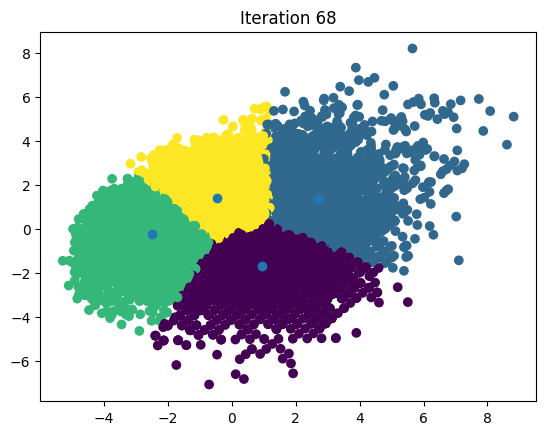

Running iteration:  68
[[5.12954906184402, 4.802434669235864, 1.1056906588477247, 1.0402557267925696, 6.080158385243066], [7.345879299156587, 7.253875549787474, 2.0128831284682933, 1.616332639527757, 5.460413979485431], [3.2669471715754446, 5.122159887797924, 1.0243899887704568, 1.0211757967044441, 2.8167264038233375], [5.315363291508061, 6.711547190610559, 1.159797366857314, 1.1124986748099395, 3.267793520590058]]


In [107]:
labels, centroids = k_means(data=lol, num_clusters=4, max_iterations=100)

For  2  clusters, Error =  36304.5731497714
For  3  clusters, Error =  30709.546693054064
For  4  clusters, Error =  27691.890358300727
For  5  clusters, Error =  25469.571893738295


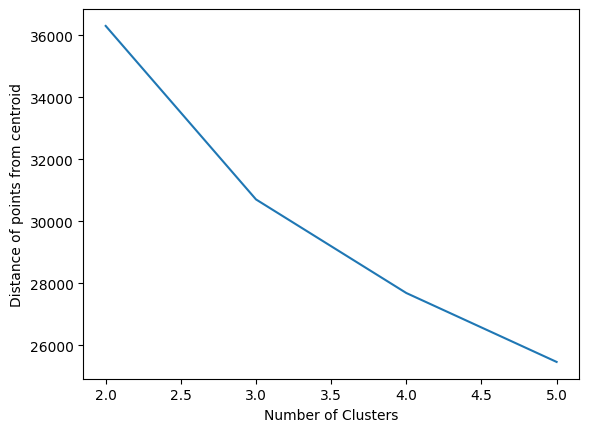

In [115]:
def k_means(data=lol, num_clusters=4, max_iterations=100):
    iteration=1
    centroids = initialize_centroids(data, num_clusters)
    while(iteration < max_iterations):
        prev_centroids = centroids
        labels = get_lables(data, centroids)
        centroids = update_centroid(data, labels, num_clusters)
        if is_same(prev_centroids, centroids):
            break
        iteration = iteration + 1
    return labels, centroids

def sse(data, labels, centroids):
    sse = 0
    for dp, label in zip(data, labels):
        sse = sse + get_distance(dp, centroids[label])
    return sse

def optimum_k(data):
    sse_vector = []
    for i in range(2,6):
        labels, centroids = k_means(data, i)
        sse_vector.append(sse(data, labels, centroids))
        print("For ",i," clusters, Error = ",sse_vector[-1])
    plt.xlabel("Number of Clusters")
    plt.ylabel("Distance of points from centroid")
    plt.plot([2,3,4,5],sse_vector)

optimum_k(lol)